# Содержание

Часть 1. Описание проекта.<br>

* 1. Описание исследования.
* 2. Цель исследования.

Часть 2. Подготовка данных.<br>

* 1. Изучение предоставленных данных.
* 2. Изменение названия колонок.
* 3. Удаление пропусков.
* 4. Изменение типов данных в колонках.
* 5. Выявление и устрание дубликатов.
* 6. Обработка аномальных значений.
* 7. Обработка пропусков.
* 8. Дополнение данных.

Часть 3. Проведение анализа данных.<br>

* 1. Выявление актуальных периода, платформ и жанров.
* 2. Описание портрета пользователя для каждого региона.

Часть 4. Проверка гипотез.<br>

* 1. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". 
* 2. Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Часть 5. Подведение итогов.<br>

* 1. Общий вывод по исследованию.

# Часть 1. Описание проекта.

## Описание исследования.

В нашем распоряжении данные с 1985г. по 2016г. из открытых источников о продажах игр. Данные содержат оценки пользователей и экспертов, жанры и платформы, а также продажи по регионам. Необходимо отработать принцип работы с данными, для того чтобы выявить потенциально популярный продукт.

## Цель исследования.

Провести анализ игр и выявить основные факторы определяющие успешность продаж игр.


# Часть 2. Подготовка данных.
## Изучение предоставленных данных.

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Отключение ошибок при построении графиков
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Чтение файла с данными
games = pd.read_csv('/datasets/games.csv')


# Функция для вывода основных данных по датасету
def all_info(data):
    data.info() #вывод общей информации
    display(data.head(5)) #вывод первых 10 значений
    display(data.describe()) #вывод описательной статистики по датасету
    display(games.duplicated().sum()) #поиск явных дубликатов в данных
    display(data.isna().mean().apply('{:.2%}'.format)) #подсчет пропусков в датасете в %

# Применение функции all_info()
all_info(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


0

Name                0.01%
Platform            0.00%
Year_of_Release     1.61%
Genre               0.01%
NA_sales            0.00%
EU_sales            0.00%
JP_sales            0.00%
Other_sales         0.00%
Critic_Score       51.32%
User_Score         40.09%
Rating             40.48%
dtype: object

**Вывод**

Датасет состоит из следующих колонок:
* name — название игры
* platform — платформа
* year_of_Release — год выпуска
* genre — жанр игры
* NA_sales — продажи в Северной Америке (млн копий)
* EU_sales — продажи в Европе (млн копий)
* JP_sales — продажи в Японии (млн копий)
* other_sales — продажи в других странах (млн копий)
* critic_Score — оценка критиков (максимум 100)
* user_Score — оценка пользователей (максимум 10)
* rating — рейтинг от организации ESRB

Предоставленные данные содержат 16715 строк. На первый взгляд, на основе общей информации можно сказать следующее:
1. Все наименования колонок написаны с заглавной буквы, для удобства следует привести их к нижнему регистру.
2. В данных присутствуют пропуски, большая часть которых находится в колонках `'Critic_Score'`, `'User_Score'`, `'Rating'`. Также есть малое число пропусков в колонках `'Name'`, `'Year_of_Release'`, `'Genre'`, суммарный объем которых ~1.63%.
3. Содержимому колонок `'Year_of_Release'`, `'User_Score'` не соответствует тип данных.  
4. Явных дубликатов в данных нет.

## Изменение названия колонок.

Все наименования колонок в данных начинаются с заглавной буквы, для удобства приведем все наименования к нижнему регистру.

In [2]:
# Приводим наименования колонок к нижнему регистру
games.columns = games.columns.str.lower()

# Проверка результата
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Удаление пропусков

В колонках `'name'`, `'year_of_release'`, `'genre'` суммарный объем пропусков ~1.63% от всех данных. Можно удалить строки с пропусками в этих колонках, т.к. это не повлияет на результат исследования. Пропуски в этих колонках скорее всего связаны либо с техническим сбоем, либо с ошибками при составлении таблицы.

In [3]:
# Удаление строк 
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
# Проверка результата
(games.isna().mean()*100).round(decimals=2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.45
user_score         40.17
rating             40.60
dtype: float64

## Изменение типов данных в колонках

Типы данных колонок `'year_of_release'` и `'user_score'` не соответствуют их содержимому, необходимо поменять типы данных, для этого воспользуемся методом `astype('int')` для колонки `'year_of_release'` и `to_numeric()` для колонки `'user_score'`. Дату выхода игр переводим в тип `int`, так как нам важен год как целое число, а не полностью дата.

In [4]:
# Перевод оценок пользователей во float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
# Перевод даты выхода в int
games['year_of_release'] = games['year_of_release'].astype('int')
# Проверка результата
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Выявление и устранение дубликатов

Как было сказано в пункте "Изучение общей информации", явных дубликатов в данных нет, проверим неявные дубликаты в колонках `'name'`, `'platform'` и `'genre'`, для этого при помощи метода `'unique()'` посмотрим какие уникальные значения есть в колоноках `'platform'` и `'genre'`, а для колонки `'name'` воспользуемся методом `'value_counts()'`. Выбор методов обусловлен тем, что платформ и жанров игр не так много и метода `'unique()'` будет достаточно в отличии от количества названий игр.

In [5]:
# Уникальные значения названий игр
print('Названия \n', games['name'].value_counts())

# Уникальные значения платформ
print('\n Платформы \n', games['platform'].unique())

# Уникальные значения жанров
print('\n Жанры \n', games['genre'].unique())

Названия 
 Need for Speed: Most Wanted                               12
LEGO Marvel Super Heroes                                   9
FIFA 14                                                    9
Ratatouille                                                9
FIFA 15                                                    8
                                                          ..
Fisherman's Bass Club                                      1
Hasbro Family Fun Pack                                     1
Animorphs: Shattered Reality                               1
Alien Trilogy                                              1
SpongeBob SquarePants: Game Boy Advance Video Volume 3     1
Name: name, Length: 11426, dtype: int64

 Платформы 
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

 Жанры 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shoot

Дубликатов в колонках `'genre'` и `'platform'` нет, но в колонке `'name'` они есть. Подробнее расммотрим их на примере первой в списке игры. 

In [6]:
# Подробнее рассмотрим игру "NFS: Most Wanted"
display(games.query('name == "Need for Speed: Most Wanted"').reset_index())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
1,523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2,1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
3,1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
4,1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
5,2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6,3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
7,5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
8,6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
9,6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубликаты обусловлены тем, что некоторые игры выходили на разных платформах или, как с NFS: Most Wanted, был перезапуск игры с одним и тем же названием, но разными годами выхода.

## Аномальные значения

В данных присутствует 1 аномальное значение, связанное с платформой DS.

In [7]:
games.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Дело в том, что платформа Nintendo DS появилась в 2004 г., т.е. на нее не могла выйти игра 1985 г. Скорее всего эту игру портировали на приставку, о чем говорит приписка "DS" в названии игры, тогда дата релиза должна быть другой. В некоторых источниках написано, что дата релиза 2010г. Поправим это значение.

In [8]:
games.loc[games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2010

## Обработка пропусков

На этапе изучения общей информации о данных было замечено, что в большая часть пропусков находится в колонках `'critic_score'`, `'user_score'`, `'rating'`.
Начнем с рейтинга игры и посмотрим какие значения принимает рейтинг в данных. Основная причина большого количества пропусков в данной колонке: игра могла не проходить классификацию по рейтингу ERSB. Этот рейтинг был основан в 1994 году, т.е. игры до 94 могли не классифицироваться. Также рейтинг скорее всего учитывает только игры от известных компаний.

In [9]:
# Уникальные значения рейтинга 
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Рейтинг "К-А" это устаревшая версия рейтинга "Е", то есть значения "К-А" можно заменить на "Е".

In [10]:
# Замена значений в колонке рейтинг
games['rating'].replace('K-A', 'E', inplace=True)
# Проверка резкльтата
print(games['rating'].value_counts())

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64


Предложения по заполнению пропусков в рейтинге игр следующее:<br>

Основным элементом, влияющим на рейтинг является жанр, можно рассмотреть в отдельности каждый жанр и выделить в каждом рейтинг с максимальным числом игр.

In [11]:
# Сохраним все жанры в отдельный список
genres = games['genre'].unique()

# Запускаем цикл по жанрам в списке.
# В цикле заполняем пустые ячейки рейтинга значениями, которые наиболее часто встречаются для данного жанра
for genre in genres:
    games.loc[games['genre'] == genre, 'rating'] = (games.loc[games['genre'] == genre, 'rating']
                                                    .fillna(games.query('genre == @genre')['rating']
                                                    .mode(dropna=True)[0]))

# Проверка результата
(games.isna().mean()*100).round(decimals=2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.45
user_score         54.62
rating              0.00
dtype: float64

В качестве значения для заполнения пропусков в колонках `'critic_score'` и `'user_score'` можно взять медиану по каждому жанру. Пропуски в этих колонках могут быть связаны со следующим: не все пользователи ставят оценки играм, а критики скорее всего оценивают только игры от известных компаний.

In [12]:
# Заполняем пропуски в колонке с оценками критиков
games['critic_score'].fillna(games.groupby('genre')['critic_score'].transform('median'), inplace=True)
# Заполняем пропуски в колонке с оценками игроков
games['user_score'].fillna(games.groupby('genre')['user_score'].transform('median'), inplace=True)
# Проверка результата
(games.isna().mean()*100).round(decimals=2)

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

## Дополнение данных

Дополним данные колонкой, в которой будем хранить сумму всех продаж по каждой игре.

In [13]:
# Дополняем таблицу
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# Проверка результата
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.5,7.7,E,0.01


**Вывод**

Наименования колонок приведены к нижнему регистру, типы данных заменены на соответствующие, пропущенные значения обработаны, дубликатов в данных не обнаружено. Также данные дополнены колонкой, содержащей общие суммы продаж по каждой игре.

# Часть 3. Проведение анализа данных.
## Выявление актуальных периода, платформ и жанров

Для выявления актуального периода рассмотрим распределение игр по годам, для этого построим график.

Text(0, 0.5, 'Количество игр')

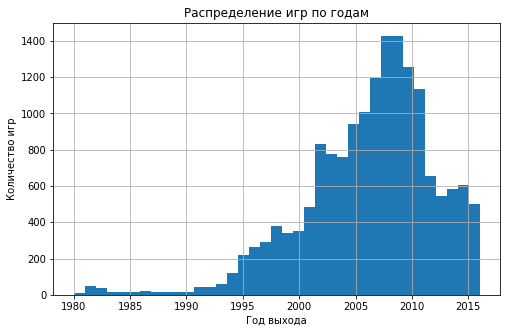

In [14]:
# Строим график
games.plot(y='year_of_release' , kind='hist', 
           bins=37, grid=True, 
           legend=False, figsize=(8,5), 
           title='Распределение игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')

Как видно на графике, резкий рост количества игр начинается с 2000 года, возможно начиная с этого года стоит рассматривать актуальный период. 
Теперь посмотрим как менялись продажи в зависимости от платформ, для этого возьмем топ-5 платформ по продажам и построим распределение по годам.

In [15]:
# Ищем 5 платформ являющимися топами по продажам по всем регионам
top_5_platform = (games.pivot_table(index=['platform'], values='all_sales',aggfunc='sum')
                  .sort_values('all_sales', ascending=False)
                  .head()
                  .reset_index())
# Вывод результата
display(top_5_platform)

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Итак, мы нашли топовые по продажам платформы, теперь рассмотрим распределение продаж игр для каждой платформы по годам.

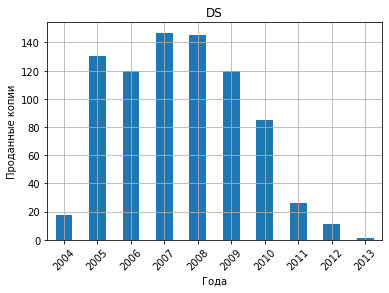

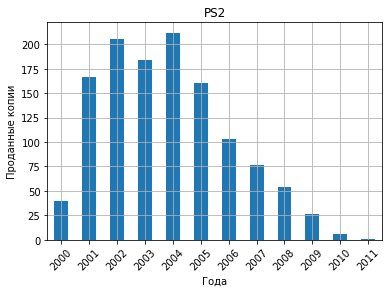

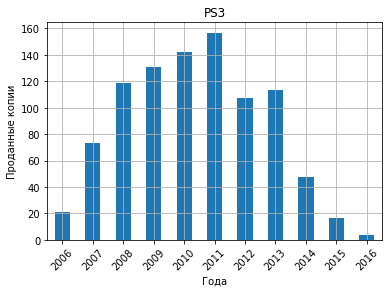

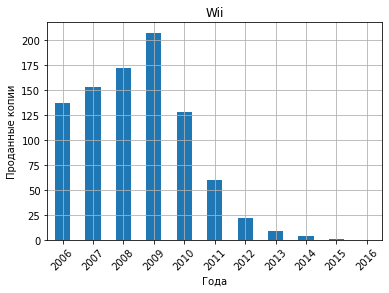

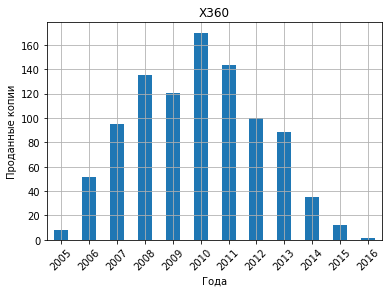

In [16]:
# Создаем сводную таблицу, в которой будем хранить значения всех продаж по годам для каждой из 5 топовых платформ
top_5_dist = (games[games['platform'].isin(top_5_platform['platform'].unique())]
             .pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
             .reset_index())

# Запустим цикл, который будет проходить по каждой платформе и выводить продажи по годам
for platform in top_5_dist['platform'].unique():
    (top_5_dist.query('platform == @platform')
     .plot(x='year_of_release', 
           y='all_sales',
           kind='bar',
           title=platform,
           rot=45,
           grid=True,
           legend=False))
    plt.xlabel('Года')
    plt.ylabel('Проданные копии')

На первый взгляд можно сказать, что платформы "живут" около 10 лет. По графикам видно, что Х360, Wii и PS3 прошли свой пик популярности и, возможно, считать их актуальными для 2017г. платформами не стоит.<br> 
Стоит  более подробно рассмотреть вопрос актуальности платформ, для этого найдем средний срок "жизни" платформы при помощи предположенного актуального периода.

In [17]:
# Создаем таблицу, в которой будем хранить платформу и 
# соответствующие ей года начала и конца выпуска игр (на основании предложенных данных) 
platform_exist = games.pivot_table(index=['platform'], values='year_of_release', aggfunc=['min','max'])
# Переименовываем колонки и избавляемся от мультииндекса
platform_exist.columns = ['min_year', 'max_year']
platform_exist.reset_index(inplace=True)

Теперь из всей таблицы выделим те платформы, которые подходят под предположенный актуальный период, но при этом уже не актуальны на 2016г.

In [18]:
# Ищем платформы
pre_actual = platform_exist.query('2000 <= min_year and max_year < 2016') 
pre_actual.reset_index(drop=True, inplace=True)
# Выведем результат
display(pre_actual)

,platform,min_year,max_year
0,DS,2004,2013
1,GBA,2000,2007
2,GC,2001,2007
3,PS2,2000,2011
4,PSP,2004,2015
5,XB,2000,2008


Найдем среднее значение среди выделенных платформ и для удобства округлим его.

In [19]:
# Поиск среднего
mean_exist = (pre_actual['max_year'] - pre_actual['min_year']).mean().round()
mean_exist

9.0

Таким образом получаем, что платформа живет в среднем 9 лет.<br>
Выделим платформы, которые потенциально будут наиболее актуальными в 2017г. исходя из среднего времени "жизни".

Для прогнозирования продаж на 2017г. будем брать данные за последние 3 года.

In [20]:
perspective_plat =  platform_exist.query('min_year >= 2007').reset_index(drop=True)
perspective_plat

,platform,min_year,max_year
0,3DS,2011,2016
1,PS4,2013,2016
2,PSV,2011,2016
3,WiiU,2012,2016
4,XOne,2013,2016


Выделим из всех данных те игры, которые выходили в актуальный период

In [21]:
# Выделим данные
actual_games = games.query('year_of_release > 2013').reset_index(drop=True)
# Проверка результата 
display(actual_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,M,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,T,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,7.4,M,7.98


Посчитаем общие продажи по каждой из платформ актуального периода.

In [22]:
# Таблица платформ и продаж в актуальном периоде
actual_games_piv = (actual_games.pivot_table(index='platform', values='all_sales', aggfunc='sum')
                    .sort_values('all_sales', ascending=False)
                    .reset_index())
actual_games_piv

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Не все платформы показывают хороший результат, можно рассмотреть те платформы, продажи которых превышают 20 млн. копий, а затем посмотрим как обстоят дела с продажами по каждой из них.<br>
Подготовим данные.

In [23]:
# Группируем данные
actual_dist = (actual_games[actual_games['platform'].isin(actual_games_piv['platform'].head(8).unique())]
             .pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
             .reset_index())

Строим графики распределения продаж по годам.

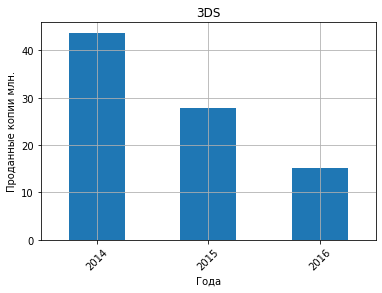

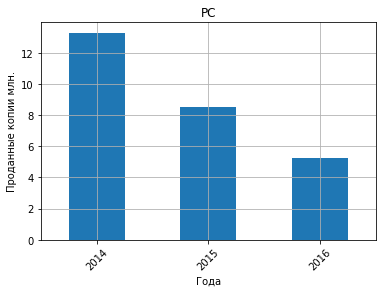

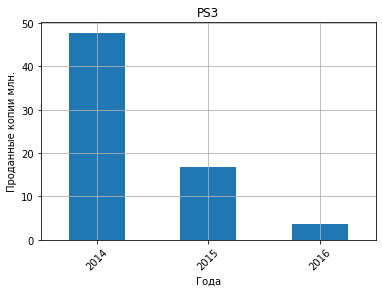

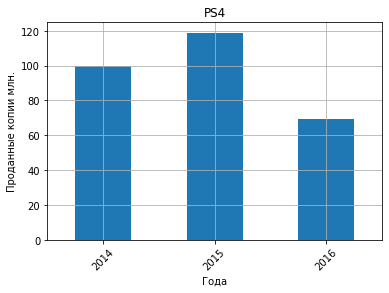

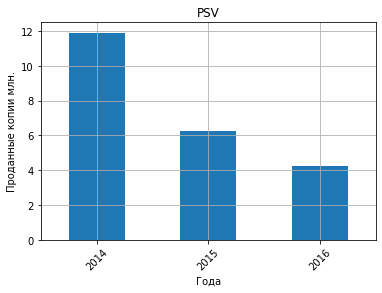

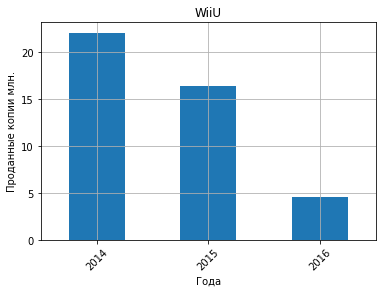

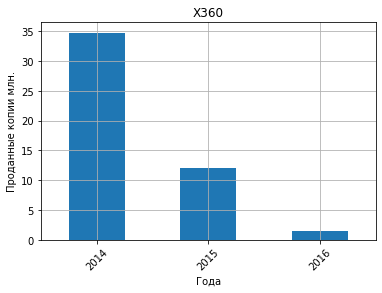

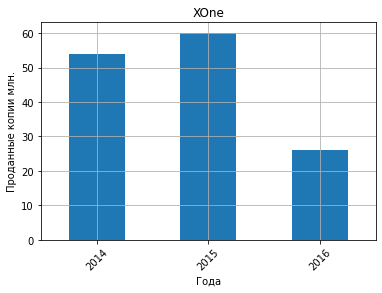

In [24]:
# Цикл, который будет строить распределение продаж по годам для каждой платформы
for platform in actual_dist['platform'].unique():
    (actual_dist.query('platform == @platform')
     .plot(x='year_of_release', 
           y='all_sales',
           kind='bar',
           title=platform,
           rot=45,
           grid=True,
           legend=False))
    plt.xlabel('Года')
    plt.ylabel('Проданные копии млн.')

По графикам можно сказать следующее:
1. X360, PS3 - платформы, продажи которых падают и показывают очень низкий результат в 2016г, что и очевидно, т.к. их средние 9 лет "жизни" подошли к концу.
2. 3DS, PC, PSV, WiiU  - показывают спад продаж, но сами продажи намного выше, чем у X360, PS3, Wii.
3. Лидерами продаж являются XOne и PS4, хоть и показывают небольшой спад продаж.

Построим диаграммы размаха для каждой платформы.

Text(0.5, 1.0, 'Распределение продаж по платформам')

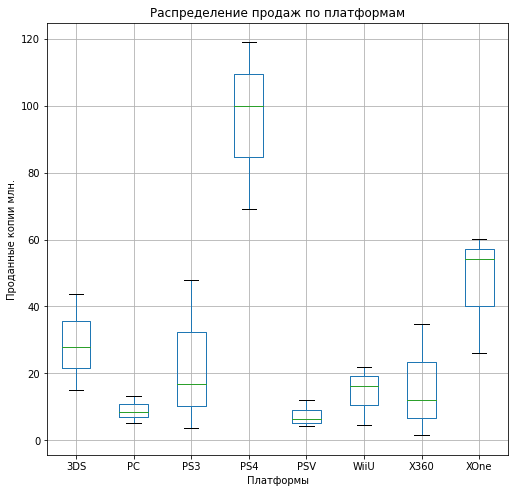

In [25]:
# Строим диаграммы размаха по платформам
actual_dist.boxplot(column='all_sales', by='platform', figsize=(8,8))
plt.suptitle('')
plt.xlabel('Платформы')
plt.ylabel('Проданные копии млн.')
plt.title('Распределение продаж по платформам')

По графику видно:
1. PSV - продажи очень низкие, т.к. размах очень мал, к тому же медиана близка к первому квартилю.
2. PS3, X360 - платформы, которые обладают большими размахами продаж, при этом медианные значения PS3, X360 низки, это говорит о том, что  игры на данные платформы в последние 3 года продаются плохо.
3. PC - небольшой размах продаж, но при этом почти симметричная картина относительно медианы.
4. WiiU - новая консоль, по сравнению с другими новыми консолями продаж меньше, но при этом медиана расположена ближе к третьему квартилю.
5. 3DS, XOne, PS4 - новые консоли, размах которых уже довольно велик при этом медианные значения у PS4 и особенно у XOne расположены ближе к третьему квартилю, что говорит о хороших продажах.

Ранее были выделены перспективные для 2017г., среди которых 3DS, WiiU, PS4 и XOne, соответственно можно сделать основной упор на эти платформы. Также есть "нестареющий" PC, который может быть актуален еще долгое время.

Рассмотрим подробнее лидера - PS4, а именно зависимость продаж от оценок критиков и пользователей.<br>
Начнем с критиков.

Коэффициент корреляции оценок критиков и продаж =  0.34616355123267706


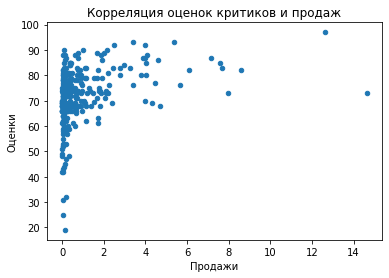

In [26]:
actual_games.query('platform == "PS4"').plot(x='all_sales', y='critic_score', kind='scatter')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.title('Корреляция оценок критиков и продаж')
print('Коэффициент корреляции оценок критиков и продаж = ',actual_games.query('platform == "PS4"')['all_sales']
      .corr(actual_games.query('platform == "PS4"')['critic_score']))

Есть очень слабая зависимость между продажами и оценками критиков.

Коэффициент корреляции оценок игроков и продаж =  -0.06709467337892867


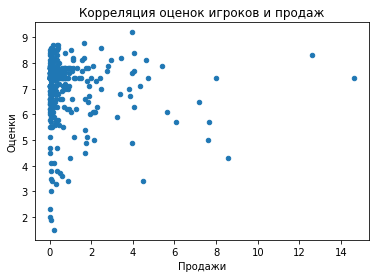

In [27]:
actual_games.query('platform == "PS4"').plot(x='all_sales', y='user_score', kind='scatter')
plt.xlabel('Продажи')
plt.ylabel('Оценки')
plt.title('Корреляция оценок игроков и продаж')
print('Коэффициент корреляции оценок игроков и продаж = ', actual_games.query('platform == "PS4"')['all_sales']
      .corr(actual_games.query('platform == "PS4"')['user_score']))

А корреляции между продажами и оценками ипользователей нет.<br>
Логичнее всего предположить, что если продажи слабо зависят от оценок критиков и не зависят от оценок пользователей для лидирующей по продаже платформе, то для других платформ ситуация будет аналогична.

Теперь рассмотрим зависимость продаж от жанров игр.

,genre,sum,mean,median
0,Action,199.36,0.322068,0.090
1,Adventure,17.55,0.094865,0.030
2,Fighting,28.22,0.470333,0.125
3,Misc,37.55,0.332301,0.090
4,Platform,18.09,0.476053,0.140
5,Puzzle,2.21,0.157857,0.045
6,Racing,27.52,0.398841,0.090
7,Role-Playing,101.44,0.459005,0.110
8,Shooter,170.94,1.335469,0.515
9,Simulation,13.13,0.298409,0.100


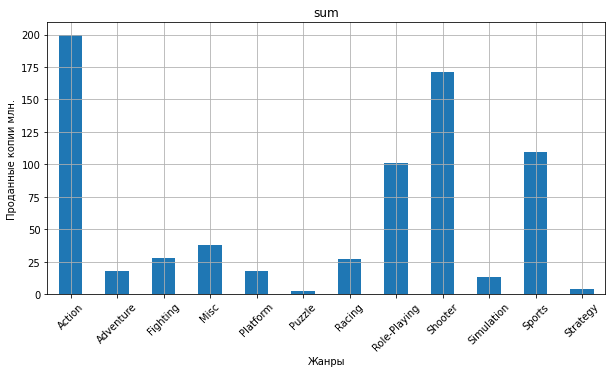

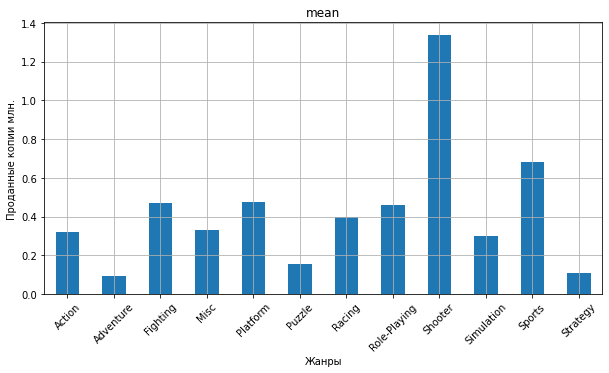

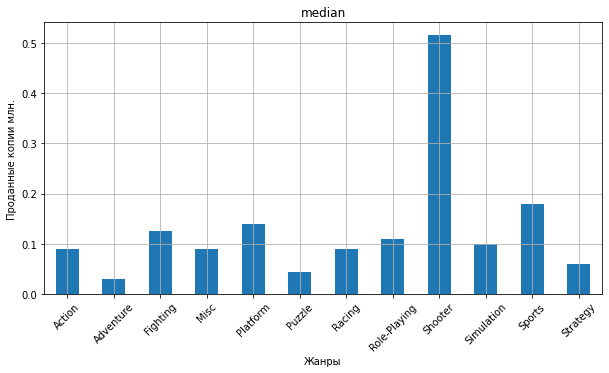

In [28]:
# Создаем сводную таблицу, в которой храним жанр, суммарные продажи, среднее и медиану по продажам
genre_dist = actual_games.pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'mean', 'median'])
genre_dist.columns = genre_dist.columns.droplevel(1)
genre_dist.reset_index(inplace=True)
#Вывод таблицы
display(genre_dist)

metrics = ['sum', 'mean', 'median']

#Строим графики по метрикам
for metric in metrics:
    (genre_dist.plot(x='genre', 
           y=metric,
           kind='bar',
           title=metric,
           figsize=(10,5),
           rot=45,
           grid=True,
           legend=False))
    plt.xlabel('Жанры')
    plt.ylabel('Проданные копии млн.')

Судя по графикам можно сказать следующее:
1. Жанры Action, Shooter и Sports показывают самые высокие общие продажи.
2. Жанры Adventure, Puzzle и Strategy показывают самые низкие общие продажи.
3. Жанры Shooter и Sports показывают самые высокие средние и медианные продажи.
4. Жанры Adventure, Puzzle и Strategy показывают самые низкие средние и медианные продажи. 

**Выводы**

1. В качестве актуального периода выбран период с 2014 по 2016 год.
2. Найдены актуальные для данного периода платформы, игры и жанры. 
3. Проведена оценка продаж для актуальных платформ:
* X360, PS3 - платформы, продажи которых падают и показывают очень низкий результат в 2016г, что и очевидно, т.к. их средние 9 лет "жизни" подошли к концу.
* DS, PC, PSV, WiiU  - показывают спад продаж, но сами продажи намного выше, чем у X360, PS3, Wii.
* Лидерами продаж являются XOne и PS4, хоть и показывают небольшой спад продаж.
4. Оценки критиков очень слабо влияют на продажи игр для той или ионй платформы, а оценки пользователей не влияют совсем.
5. Самыми прибыльными жанрами являются Shooter и Sports, жанры Adventure, Puzzle и Strategy показывают самые низкие продажи.
6. PS4, XOne, WiiU, 3DS - наиболее свежие перспективные игровые приставки для данного периода времени и PC - платформа, игры на которую выпускаются с 1985 года, чье железо можно обновить для соответствия требованиям игр.

## Описание портерета пользователя для каждого региона.

Для определения портерета пользователя для каждого региона выполним следующие действия:
1. Выделим самые популярные платформы (топ-5) для каждого региона.
2. Выделим самые популярные жанры (топ-5) для каждого региона.
3. Оценим влияние рейтинга ESRB на продажи в отдельном регионе.

Для начала выполним пункт 1, т.е. найдем топ-5 популярные платформы для каждого региона.

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Text(0, 0.5, '')

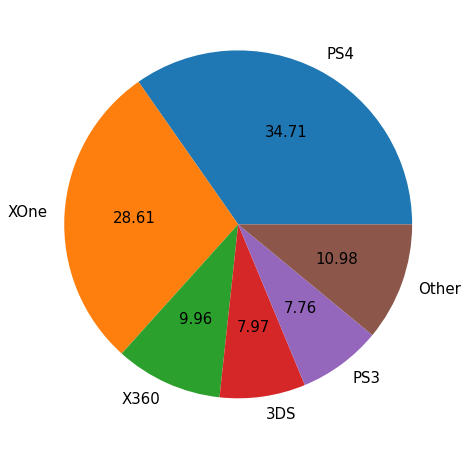

In [29]:
# Выделяем топ-5 для NA-региона
na_platform = (actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum')
               .sort_values('na_sales', ascending=False)
               .reset_index())

na_top_plat = na_platform.head()
# Проверка результата
display(na_top_plat)

# Остальные платформы объединим в отделльную группу
new_row = {'platform':'Other', 'na_sales': na_platform[5:]['na_sales'].apply('sum')} 
na_top_plat = na_top_plat.append(new_row, ignore_index=True)

# Круговая диаграмма
na_top_plat.plot.pie(y='na_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=na_top_plat['platform'], 
                  legend=False)
plt.ylabel('')

Лидером среди популярных платформ для NA-региона является PS4 затем идут XOne, X360, 3DS и PS3 - платформы, которые были наиболее актуальны для рассматриваемого периода.

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Text(0, 0.5, '')

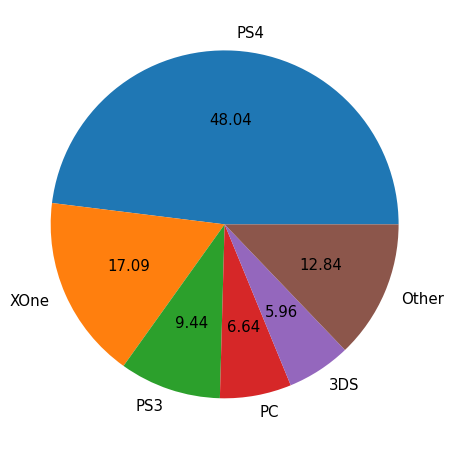

In [30]:
# Выделяем топ-5 для EU-региона
eu_platform = (actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
               .sort_values('eu_sales', ascending=False)
               .reset_index())

eu_top_plat = eu_platform.head()
# Проверка результата
display(eu_top_plat)

# Остальные платформы объединим в отделльную группу
new_row = {'platform':'Other', 'eu_sales': eu_platform[5:]['eu_sales'].apply('sum')} 
eu_top_plat = eu_top_plat.append(new_row, ignore_index=True)

# Круговая диаграмма
eu_top_plat.plot.pie(y='eu_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=eu_top_plat['platform'], 
                  legend=False)
plt.ylabel('')

Лидером среди популярных платформ для EU-региона является PS4 затем идут XOne, PS3, PC, 3DS. 

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Text(0, 0.5, '')

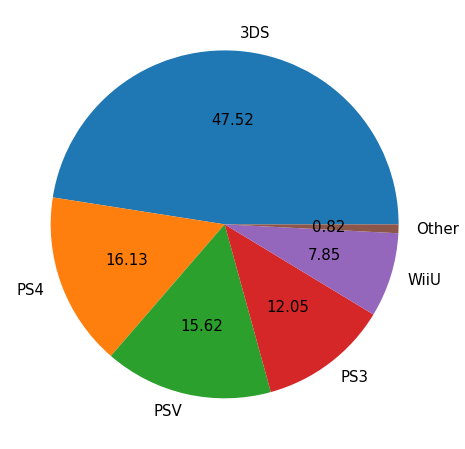

In [31]:
# Выделяем топ-5 для JP-региона
jp_platform = (actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
               .sort_values('jp_sales', ascending=False)
               .reset_index())

jp_top_plat = jp_platform.head()
# Проверка результата
display(jp_top_plat)

# Остальные платформы объединим в отделльную группу
new_row = {'platform':'Other', 'jp_sales': jp_platform[5:]['jp_sales'].apply('sum')} 
jp_top_plat = jp_top_plat.append(new_row, ignore_index=True)

# Круговая диаграмма
jp_top_plat.plot.pie(y='jp_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=jp_top_plat['platform'], 
                  legend=False)
plt.ylabel('')

Наиболее интересная картина для JP-региона. Лидером среди популярных платформ является 3DS затем идут PS4, PSV, PS3, WiiU. Можно сказать, что в данном регионе портативные приставки намного популярнее стационарных.

Теперь найдем топ-5 популярных жанров.

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Text(0, 0.5, '')

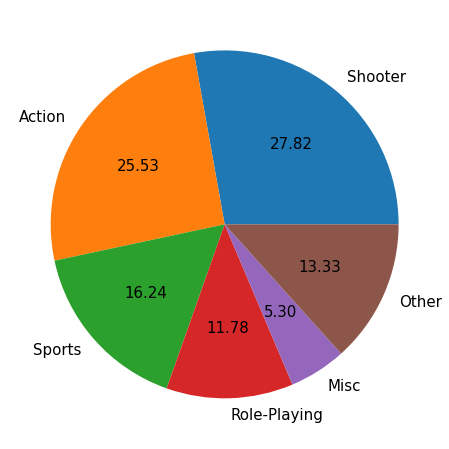

In [32]:
# Выделяем топ-5 для NA-региона
na_region = (actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
            .sort_values('na_sales', ascending=False)
            .reset_index())

na_top_gen = na_region.head()
# Вывод результата
display(na_top_gen)

# Остальные жанры объединим в отделльную группу
new_row = {'genre':'Other', 'na_sales': na_region[5:]['na_sales'].apply('sum')} 
na_top_gen = na_top_gen.append(new_row, ignore_index=True)

# Круговая диаграмма
na_top_gen.plot.pie(y='na_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=na_top_gen['genre'], 
                  legend=False)
plt.ylabel('')

Для данного региона наиболее популярны Shooter, Action, Sports, Role-Plaing.

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Text(0, 0.5, '')

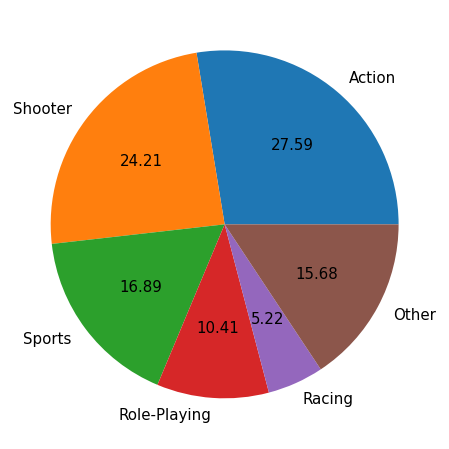

In [33]:
# Выделяем топ-5 для UE-региона
eu_region = (actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
            .sort_values('eu_sales', ascending=False)
            .reset_index())

eu_top_gen = eu_region.head()
# Вывод результата
display(eu_top_gen)

new_row = {'genre':'Other', 'eu_sales': eu_region[5:]['eu_sales'].apply('sum')} 
eu_top_gen = eu_top_gen.append(new_row, ignore_index=True)

# Круговая диаграмма
eu_top_gen.plot.pie(y='eu_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=eu_top_gen['genre'], 
                  legend=False)
plt.ylabel('')

Для EU-региона популярны почти те же жанры, что и в NA-регионе, Action, Shooter, Sports, Role-Plaing только отличается соотношение. К тому же здесь интересен жанр  Racing.

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Text(0, 0.5, '')

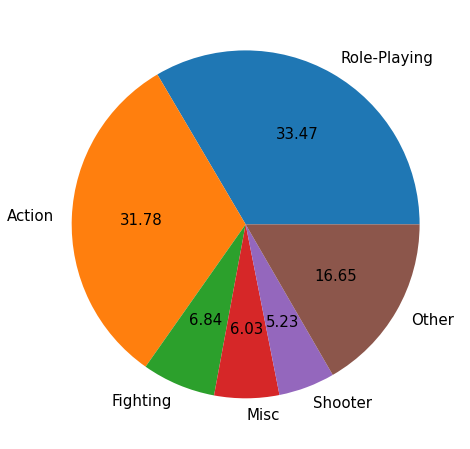

In [34]:
# Выделяем топ-5 для JP-региона
jp_region = (actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
            .sort_values('jp_sales', ascending=False)
            .reset_index())

jp_top_gen = jp_region.head()
# Вывод результата
display(jp_top_gen)

new_row = {'genre':'Other', 'jp_sales': jp_region[5:]['jp_sales'].apply('sum')} 
jp_top_gen = jp_top_gen.append(new_row, ignore_index=True)

# Круговая диаграмма
jp_top_gen.plot.pie(y='jp_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=jp_top_gen['genre'], 
                  legend=False)
plt.ylabel('')

А вот с JP-регионом ситуация опять иная, самый популярный жанр Role-Plaing, затем Action, Fighting, Shooter.

Попробуем оценить взаимосвязь рейтинга игры и ее продаж. Напрямую проверить коррляцию не получится, поэтому построим диаграмму, на которой в процентах покажем продажи игр разных рейтингов.

Text(0, 0.5, '')

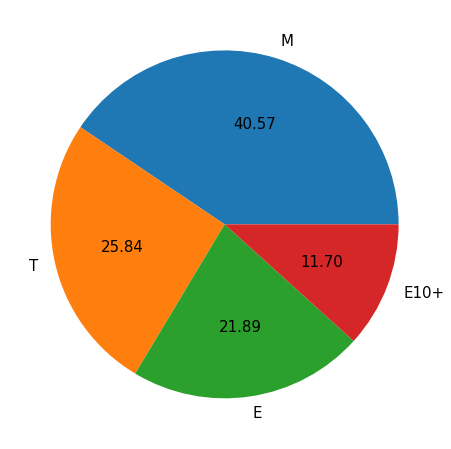

In [35]:
# Выделяем рейтинг для NA-региона
na_rating = (actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum')
            .sort_values('na_sales', ascending=False)
            .reset_index())
# Круговая диаграмма
na_rating.head(4).plot.pie(y='na_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=na_rating['rating'], 
                  legend=False)
plt.ylabel('')

# na_rating_new = na_rating.head(4).replace({'rating' : { 'E' : 1, 'M' : 4, 'T': 3, 'E10+' : 2}})
# na_rating_new['rating'].corr(na_rating_new['na_sales'])

Text(0, 0.5, '')

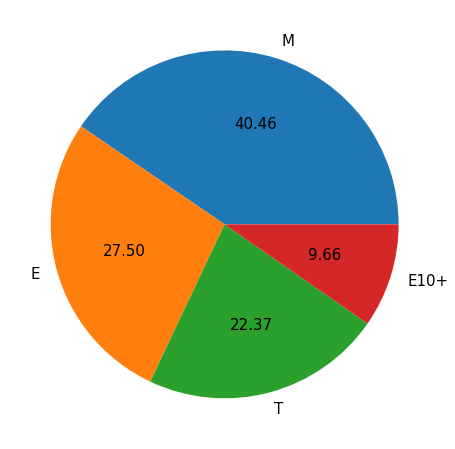

In [36]:
# Выделяем рейтинг для EU-региона
eu_rating = (actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
            .sort_values('eu_sales', ascending=False)
            .reset_index())
# Круговая диаграмма
eu_rating.head(4).plot.pie(y='eu_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=eu_rating['rating'], 
                  legend=False)
plt.ylabel('')

# eu_rating_new = eu_rating.head(4).replace({'rating' : { 'E' : 1, 'M' : 4, 'T': 3, 'E10+' : 2}})
# eu_rating_new['rating'].corr(eu_rating_new['eu_sales'])

Text(0, 0.5, '')

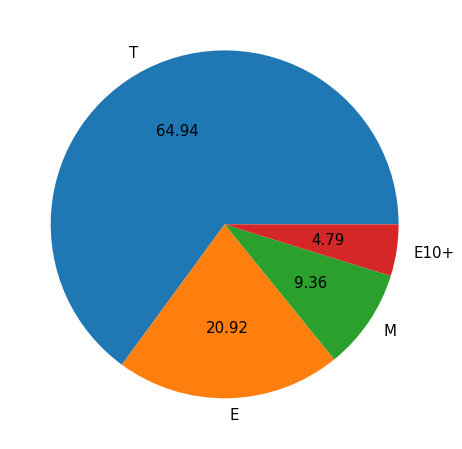

In [37]:
# Выделяем рейтинг для JP-региона
jp_rating = (actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
            .sort_values('jp_sales', ascending=False)
            .reset_index())
# Круговая диаграмма
jp_rating.head(4).plot.pie(y='jp_sales', 
                  autopct="%.2f", 
                  figsize=(8,8), 
                  fontsize=15, 
                  subplots=True, 
                  labels=jp_rating['rating'], 
                  legend=False)
plt.ylabel('')


# jp_rating_new = jp_rating.head(4).replace({'rating' : { 'E' : 1, 'M' : 4, 'T': 3, 'E10+' : 2}})
# jp_rating_new['rating'].corr(jp_rating_new['jp_sales'])

Распределение продаж по рейтингу для NA-региона и EU-региона примерно одинаковые, в то время как в JP-регионе совершенно иная картина. Скорее всего это связано с разным отношением к цензуре в играх. Так что можно сказать, что рейтинг игры влияет на ее продажи в зависимости от региона.

# Часть 4. Проверка гипотез.
## Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". 

Рассмотрим следующую нулевую гипотезу - "средние пользовательские рейтинги платформ Xbox One и PC не различаются". Сформулируем альтернативную гипотезу - "средние пользовательские рейтинги платформ Xbox One и PC различаются". Для проверки гипотез создадим два датасета xone_user_rat и pc_user_rat, в которых будем оценки по каждой игре.

In [38]:
# Датасет "XOne"
xone_user_rat = actual_games.query('platform == "XOne"')['user_score'].reset_index(drop=True)
display(xone_user_rat.head(5))

# Датасет "PC"
pc_user_rat = actual_games.query('platform == "PC"')['user_score'].reset_index(drop=True)
display(pc_user_rat.head(5))

0    7.4
1    7.9
2    5.4
3    6.4
4    6.2
Name: user_score, dtype: float64

0    3.9
1    5.4
2    7.5
3    7.9
4    5.7
Name: user_score, dtype: float64

Так как мы рассматриваем одностороннюю гипотезу, то воспользуемся  методом st.ttest_ind(), установим уровень значимости 5%.

In [39]:
# Устанавливаем уровень значимости
alpha = .05
# Применяем метод для сравнения средних
result = st.ttest_ind(xone_user_rat, pc_user_rat, equal_var=False)
# Вывод p-value
print(result.pvalue)
# Вывод по гипотезе
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.05074473945849195
Не получилось отвергнуть нулевую гипотезу


Гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC не различаются, не удалось опровергнуть.

## Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Рассмотрим следующую нулевую гипотезу - "средние пользовательские рейтинги жанров Action  и Sports не различаются". Сформулируем альтернативную гипотезу - "средние пользовательские рейтинги жанров Action и Sports различаются". Для проверки гипотез создадим два датасета action_user_rat и sports_user_rat, в которых будем оценки по каждой игре.

In [40]:
# Датасет "Action"
action_user_rat = actual_games.query('genre == "Action"')['user_score'].reset_index(drop=True)
display(action_user_rat.head(5))

# Датасет "Sports"
sports_user_rat = actual_games.query('genre == "Sports"')['user_score'].reset_index(drop=True)
display(sports_user_rat.head(5))

0    8.3
1    7.9
2    7.4
3    8.1
4    6.3
Name: user_score, dtype: float64

0    4.3
1    5.0
2    5.7
3    4.5
4    6.7
Name: user_score, dtype: float64

In [41]:
# Устанавливаем уровень значимости
alpha = .05
# Применяем метод для сравнения средних
result = st.ttest_ind(action_user_rat, sports_user_rat, equal_var=False)
# Вывод p-value
print(result.pvalue)
# Вывод по гипотезе
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

7.412639945317349e-17
Отвергаем нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги жанров Action и Sports различаются.

# Часть 5. Подведение итогов.
## Общий вывод по исследованию.

На основании проведенного исследования можно сказать следующее:
1. Стоит делать акцент на игры для следующих платформ: 
* PS4, XOne, 3DS - наиболее свежие перспективные игровые приставки.
* PC - платформа, игры на которую выпускаются с 1985 года, чье железо можно обновить для соответствия требованиям игр.
2. Для NA и EU регионов стоит делать акцент на следующие жанры: Action, Shooter, Sports. Для JP-региона в первую очередь на игры жанра Role-Playing и Action.
3. Стоит учитывать рейтинг игр для регионов.